<a href="https://colab.research.google.com/github/shadmanshakib09/Statistics/blob/main/Statistics_Part04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Today we will look out Normal Distribution Function and Standard Normal Distribution Function

In [2]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_width', ylabel='Density'>

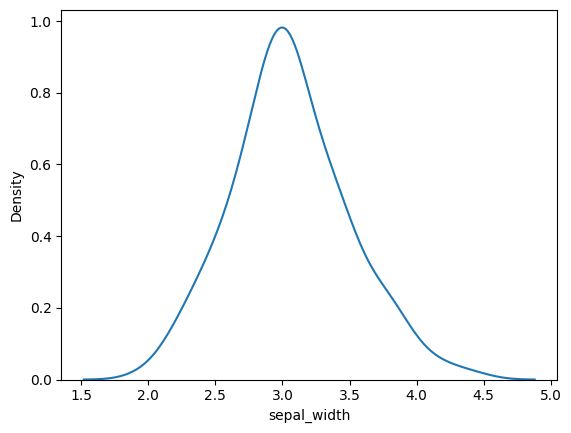

In [3]:
sns.kdeplot(df['sepal_width']) #the data is normally distributed but not standard.

In [4]:
df['sepal_width'].mean()

3.0573333333333337

In [5]:
df['sepal_width'].std()

0.4358662849366982

In [6]:
#Convert this data into Standard Normal Distrbution

x = (df['sepal_width']-df['sepal_width'].mean())/df['sepal_width'].std()

<Axes: xlabel='sepal_width', ylabel='Density'>

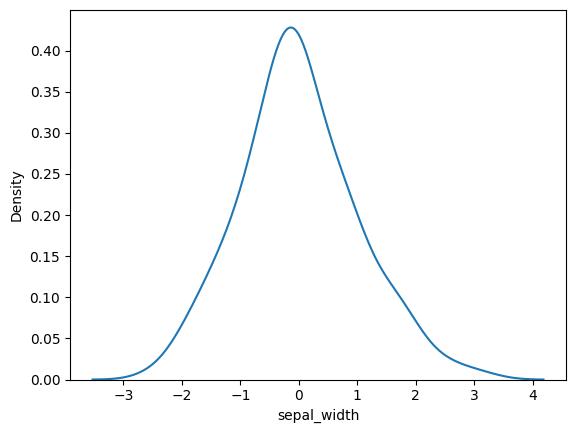

In [7]:
sns.kdeplot(x)

In [8]:
x.mean()

-7.815970093361102e-16

In [9]:
x.std()

1.0

# SKEWNESS

<Axes: xlabel='sepal_length', ylabel='Density'>

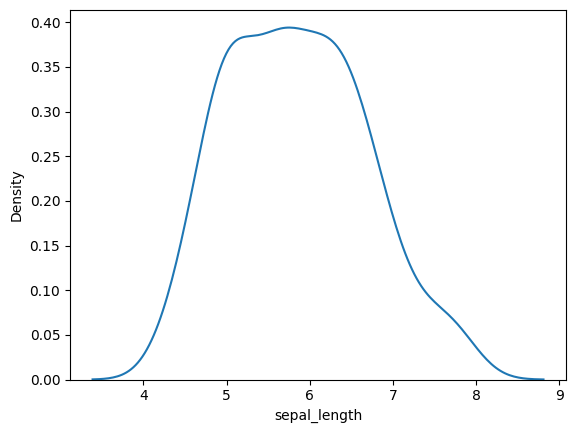

In [10]:
sns.kdeplot(df['sepal_length'])

In [11]:
df['sepal_length'].skew()

0.3149109566369728

In [12]:
#OUTLIER DETECTION

In [13]:
df['sepal_length'].mean()+3*df['sepal_length'].std()

8.327531717266922

In [14]:
df['sepal_length'].mean()-3*df['sepal_length'].std()

3.3591349493997447

In [15]:
df[df['sepal_length']<3]

,sepal_length,sepal_width,petal_length,petal_width,species


In [16]:
df[df['sepal_length']>8]

,sepal_length,sepal_width,petal_length,petal_width,species


<Axes: ylabel='sepal_length'>

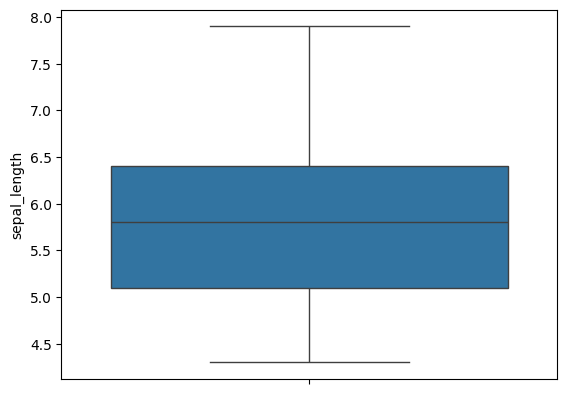

In [17]:
sns.boxplot(df['sepal_length']) #no outliers

We will test whether this sepal_length is normally distributed or not

In [18]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [20]:
df2  = sorted(df['sepal_length'].tolist())


In [21]:
y_quant = []
for i in range(1,101):
    y_quant.append(np.percentile(df2,i))

<Axes: ylabel='Density'>

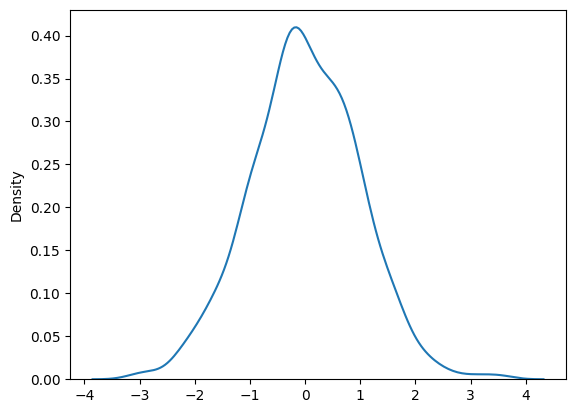

In [23]:
samples = np.random.normal(loc=0, scale=1, size=1000)
sns.kdeplot(samples)

In [24]:
x_quant = []
for i in range(1,101):
    x_quant.append(np.percentile(samples,i))

<Axes: >

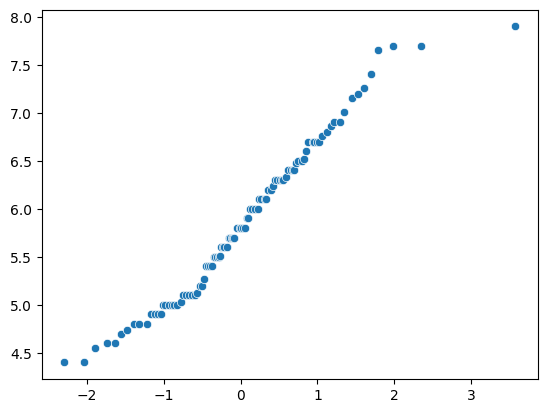

In [26]:
sns.scatterplot(x=x_quant,y=y_quant)

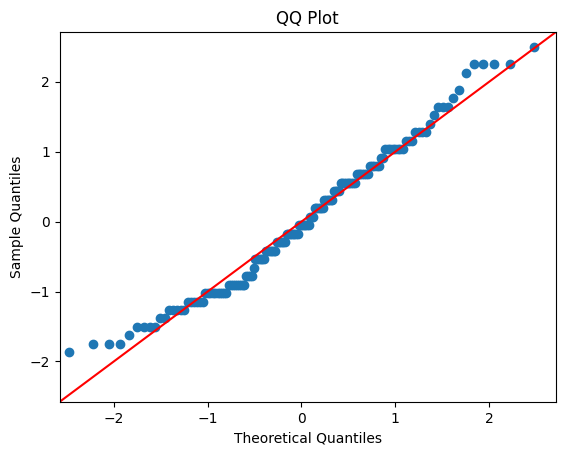

In [27]:
#using statsmodel
import statsmodels.api as sm
fig = sm.qqplot(df['sepal_length'], line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

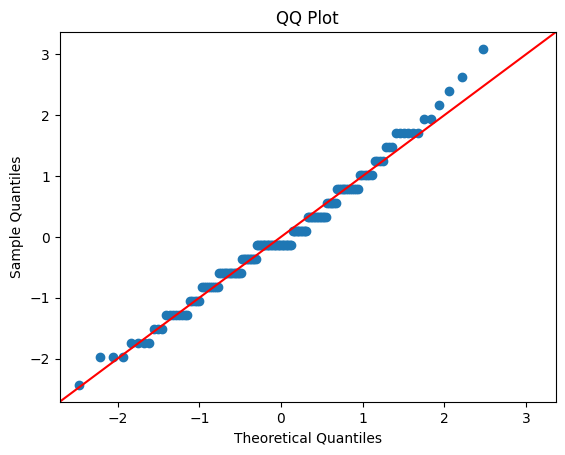

In [31]:
#using statsmodel
import statsmodels.api as sm
fig = sm.qqplot(df['sepal_width'], line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

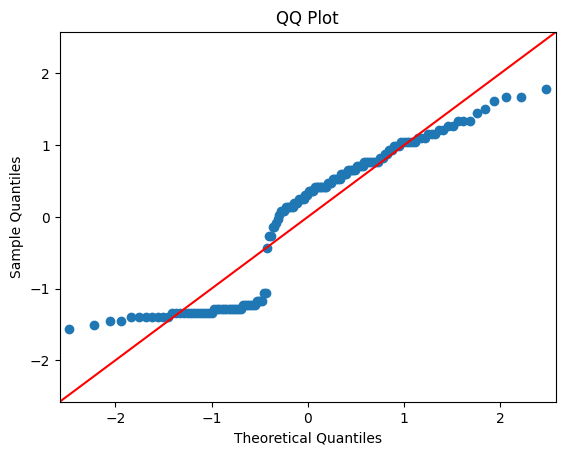

In [32]:
#using statsmodel
import statsmodels.api as sm
fig = sm.qqplot(df['petal_length'], line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

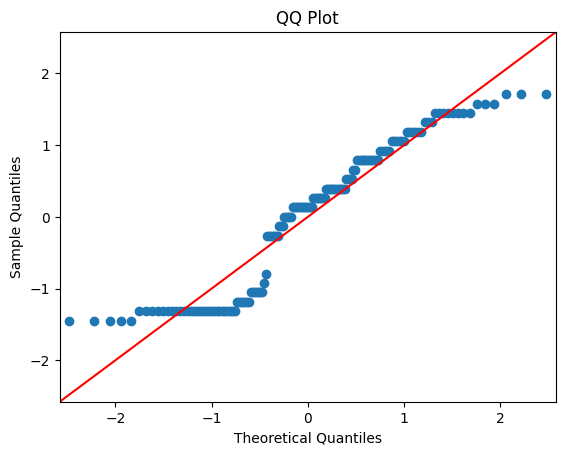

In [33]:
#using statsmodel
import statsmodels.api as sm
fig = sm.qqplot(df['petal_width'], line='45',fit=True)
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [40]:
#Q-Q plot is used to check any kind of distribution

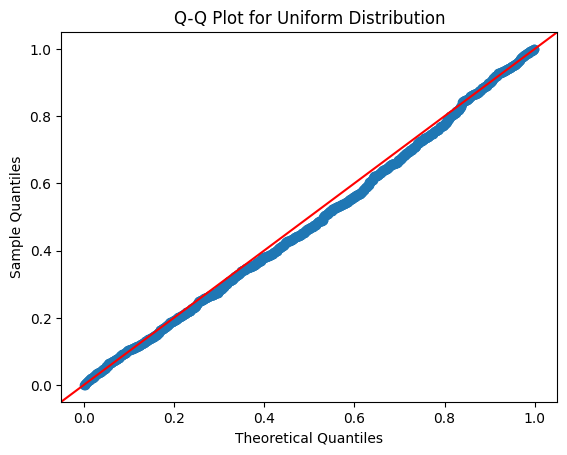

In [36]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Generate random data from a uniform distribution
uniform_data = np.random.uniform(low=0, high=1, size=1000)

# Generate Q-Q plot with uniform distribution from scipy.stats
sm.qqplot(uniform_data, line='45', dist=uniform, loc=0, scale=1)

# Set the plot title and labels
plt.title('Q-Q Plot for Uniform Distribution')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')

# Display the plot
plt.show()


<Axes: ylabel='Density'>

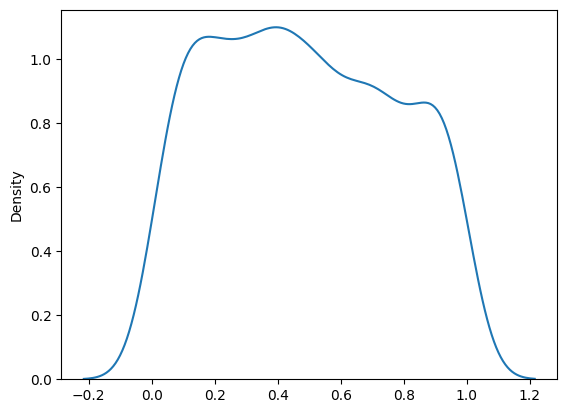

In [37]:
sns.kdeplot(uniform_data)

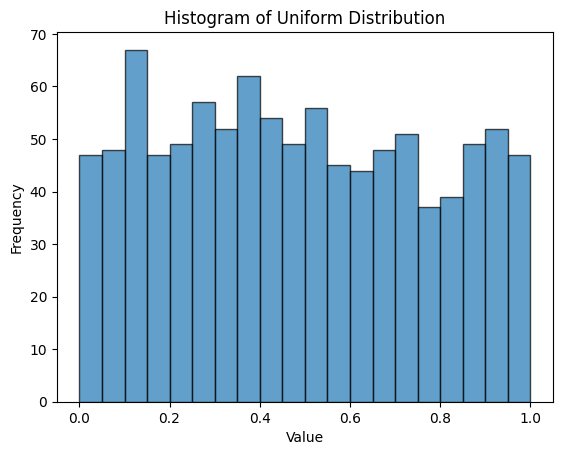

In [39]:

# Create the histogram plot
plt.hist(uniform_data, bins=20, edgecolor='black', alpha=0.7)

# Set the plot title and labels
plt.title('Histogram of Uniform Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Display the plot
plt.show()


# Pareto Distriution (How to detect Pareto Distribution)

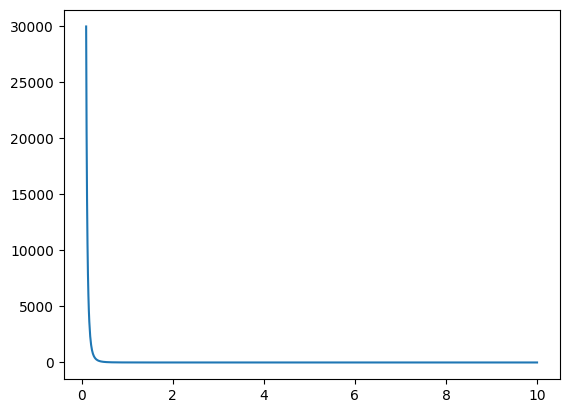

In [7]:
#log-log plot
alpha = 3
xm = 1
x = np.linspace(0.1, 10, 1000)
y = (alpha * (xm**alpha)) / x**(alpha+1)
plt.plot(x,y)

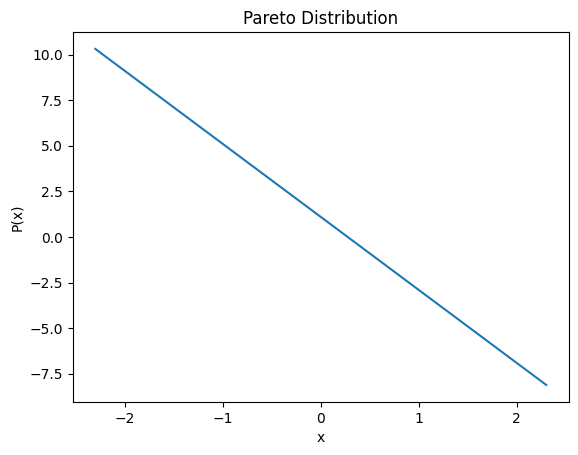

In [5]:
plt.plot(np.log(x),np.log(y))

plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Pareto Distribution')
plt.show()

In [13]:
#Q-Q plot
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [14]:
alpha_1 = 2
xm_1 = 1

In [15]:
x = stats.pareto.rvs(b = alpha_1, scale = xm_1, size=1000)

(array([988.,   9.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   1.]),
 array([ 1.00021637,  9.12849833, 17.25678029, 25.38506224, 33.5133442 ,
        41.64162615, 49.76990811, 57.89819007, 66.02647202, 74.15475398,
        82.28303593]),
 <BarContainer object of 10 artists>)

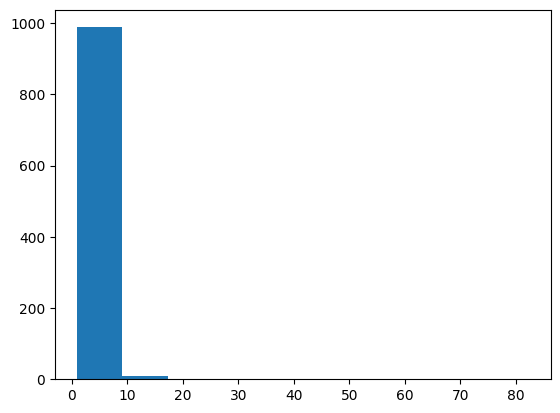

In [16]:
plt.hist(x)

<ipython-input-18-5ec1fbeebf40>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x)


<Axes: ylabel='Density'>

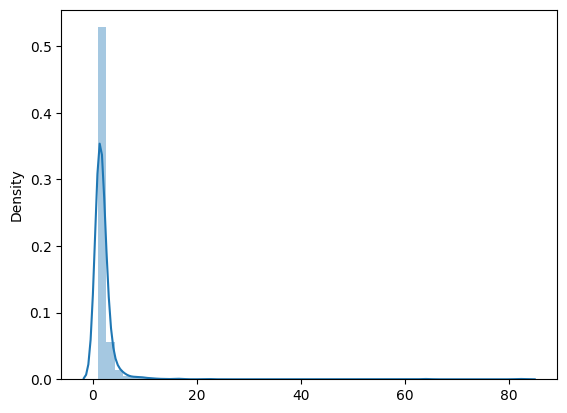

In [18]:
sns.distplot(x)

In [23]:
params = stats.pareto.fit(x, floc=0)
dist = stats.pareto(b = params[0], scale = params[2])

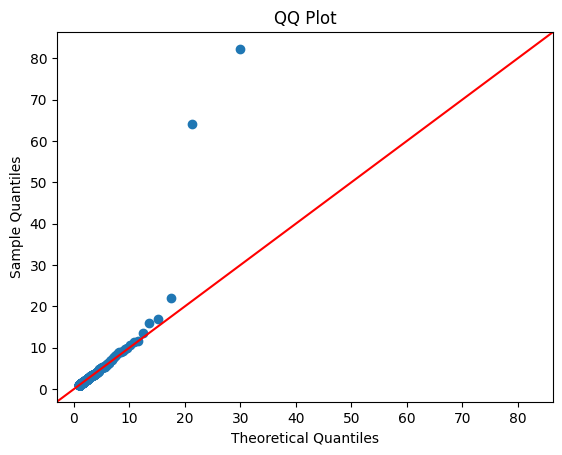

In [24]:
fig = sm.qqplot(x, dist = dist, line='45')
plt.title('QQ Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()